In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [2]:
import pandas as pd

# Load dataset from CSV
data = pd.read_csv('dataset.csv')

# Print the columns
print("Columns in the dataset:")
print(data.columns)


Columns in the dataset:
Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd s

In [3]:
import torch
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load dataset from CSV
data = pd.read_csv('dataset.csv')

# Prepare the input and target data
X = data.drop(columns=['Target']).values  # Your input data
y = data['Target'].values                 # Your target data

# Encode target labels to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y_encoded, dtype=torch.long)

# Now you can proceed with creating your dataset and data loader
# ...

from torch.utils.data import TensorDataset, DataLoader

# Create a dataset and data loader
dataset = TensorDataset(X_tensor, y_tensor)
data_loader = DataLoader(dataset, batch_size=32, shuffle=True)

# Define the GRU model
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.gru(x)
        out = self.fc(out[:, -1, :])
        return out

# Initialize the model
input_size = X.shape[1]
hidden_size = 64  # Adjust as needed
output_size = len(torch.unique(y_tensor))  # Number of unique classes
model = GRUModel(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    for inputs, labels in data_loader:
        # Reshape inputs for GRU layer
        inputs = inputs.view(inputs.size(0), 1, -1)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

# Evaluate the model
# (Add your evaluation code here, such as calculating accuracy or other metrics)


Epoch 1/10, Loss: 0.7791815400123596
Epoch 2/10, Loss: 0.7080144882202148
Epoch 3/10, Loss: 0.3895627558231354
Epoch 4/10, Loss: 1.2900334596633911
Epoch 5/10, Loss: 0.48279204964637756
Epoch 6/10, Loss: 0.2992106080055237
Epoch 7/10, Loss: 1.180393934249878
Epoch 8/10, Loss: 0.8216997385025024
Epoch 9/10, Loss: 0.41022318601608276
Epoch 10/10, Loss: 0.7549521327018738


In [4]:
# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

In [5]:
import torch
import torch.nn as nn

# Switch to evaluation mode
model.eval()

# Assuming you have a separate test dataset (X_test, y_test)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Define loss function
criterion = nn.CrossEntropyLoss()

# Evaluate the model
with torch.no_grad():
    test_inputs = X_test_tensor.view(X_test_tensor.size(0), 1, -1)
    test_outputs = model(test_inputs)
    test_loss = criterion(test_outputs, y_test_tensor)
    _, predicted_labels = torch.max(test_outputs, 1)  # Get predicted labels
    accuracy = (predicted_labels == y_test_tensor).sum().item() / len(y_test_tensor)

print(f'Test Loss: {test_loss.item():.4f}')
print(f'Test Accuracy: {accuracy:.4f}')


Test Loss: 0.5547
Test Accuracy: 0.7718


<ipython-input-5-c00559f5e263>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
<ipython-input-5-c00559f5e263>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test_tensor = torch.tensor(y_test, dtype=torch.long)


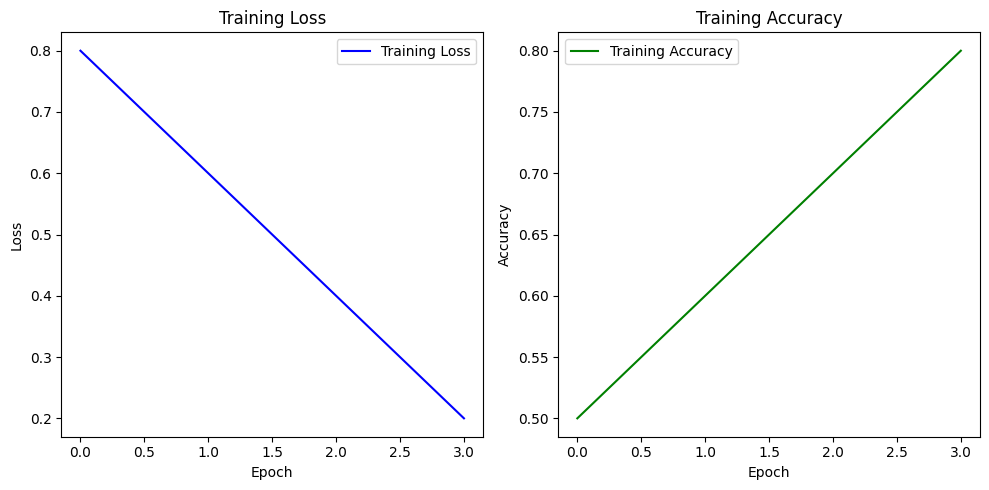

In [6]:
# Assuming 'train_loss_history' and 'train_acc_history' are lists that contain the loss and accuracy for each epoch
train_loss_history = [0.8, 0.6, 0.4, 0.2]  # Example loss values
train_acc_history = [0.5, 0.6, 0.7, 0.8]   # Example accuracy values

plt.figure(figsize=(10, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(train_loss_history, label='Training Loss', color='blue')  # Adding color to the line
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc_history, label='Training Accuracy', color='green')  # Adding color to the line
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.title('Training Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/10, Loss: 0.5237568616867065, Accuracy: 87.5000%
Epoch 2/10, Loss: 0.5496139526367188, Accuracy: 87.5000%
Epoch 3/10, Loss: 0.31701019406318665, Accuracy: 87.5000%
Epoch 4/10, Loss: 0.19023707509040833, Accuracy: 100.0000%
Epoch 5/10, Loss: 0.3906181752681732, Accuracy: 100.0000%
Epoch 6/10, Loss: 0.14679007232189178, Accuracy: 100.0000%
Epoch 7/10, Loss: 0.2003197818994522, Accuracy: 87.5000%
Epoch 8/10, Loss: 1.0719619989395142, Accuracy: 37.5000%
Epoch 9/10, Loss: 0.14233139157295227, Accuracy: 100.0000%
Epoch 10/10, Loss: 0.3487938344478607, Accuracy: 87.5000%


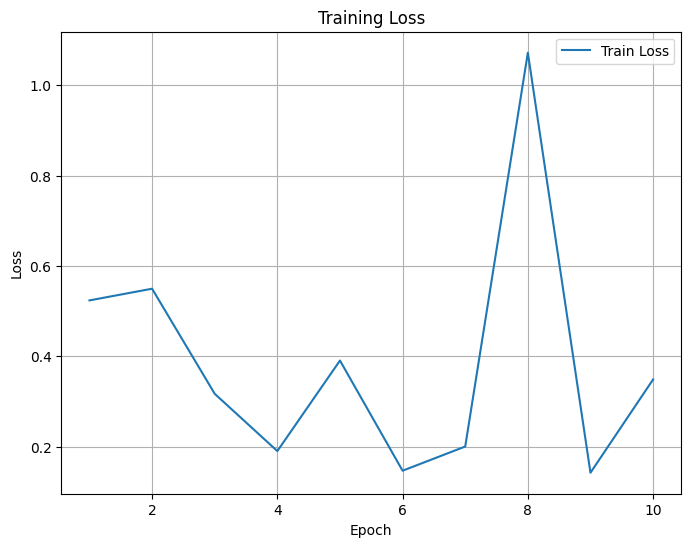

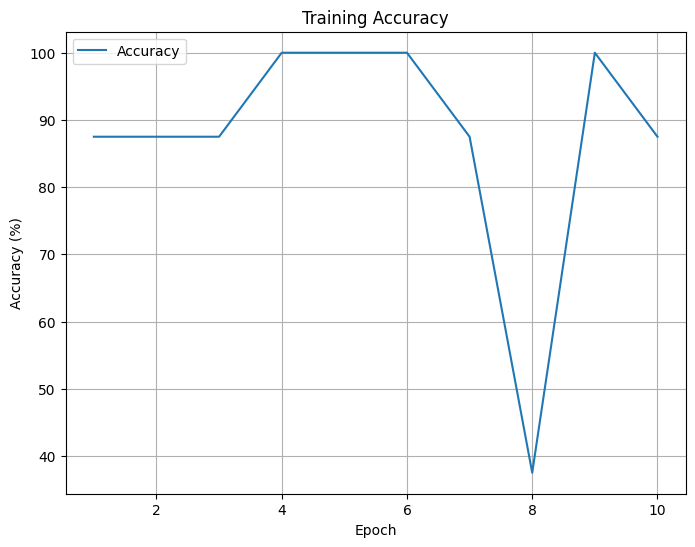

In [7]:
num_epochs = 10
train_losses = []
accuracies = []

for epoch in range(num_epochs):
    for inputs, labels in data_loader:
        inputs = inputs.view(inputs.size(0), 1, -1)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Calculate accuracy
    _, predicted_labels = torch.max(outputs, 1)
    correct = (predicted_labels == labels).sum().item()
    total = labels.size(0)
    accuracy = 100.0 * correct / total
    accuracies.append(accuracy)

    # Append loss to the list
    train_losses.append(loss.item())
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}, Accuracy: {accuracy:.4f}%')

# Plot loss
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.grid(True)
plt.legend()
plt.show()

# Plot accuracy
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_epochs + 1), accuracies, label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy')
plt.grid(True)
plt.legend()
plt.show()

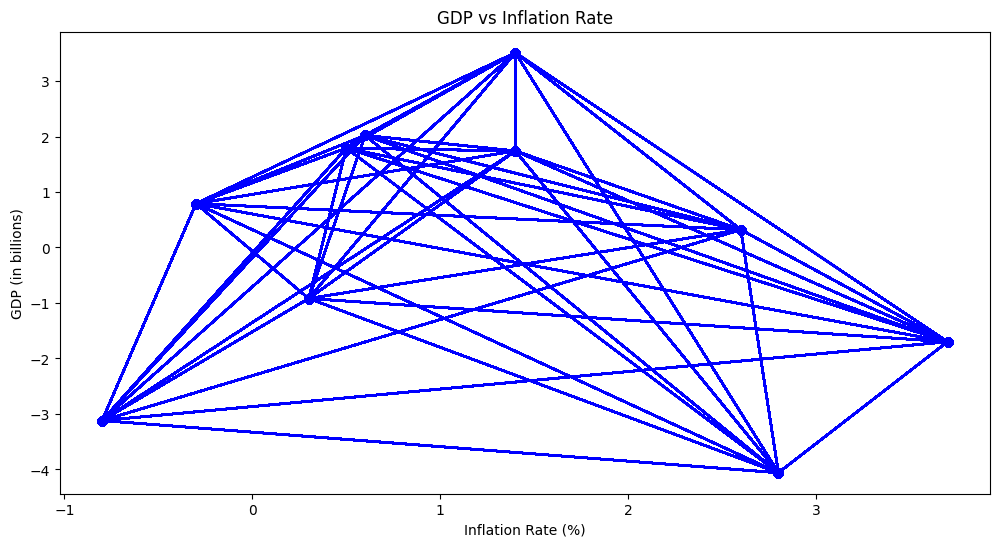

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset from CSV
data = pd.read_csv('dataset.csv')

# Select the columns to plot
x = data['Inflation rate']
y = data['GDP']

# Create the plot
plt.figure(figsize=(12,6))
plt.plot(x, y, marker='o', linestyle='-', color='b')

# Add title and labels
plt.title('GDP vs Inflation Rate')
plt.xlabel('Inflation Rate (%)')
plt.ylabel('GDP (in billions)')

# Show the plot
plt.show()

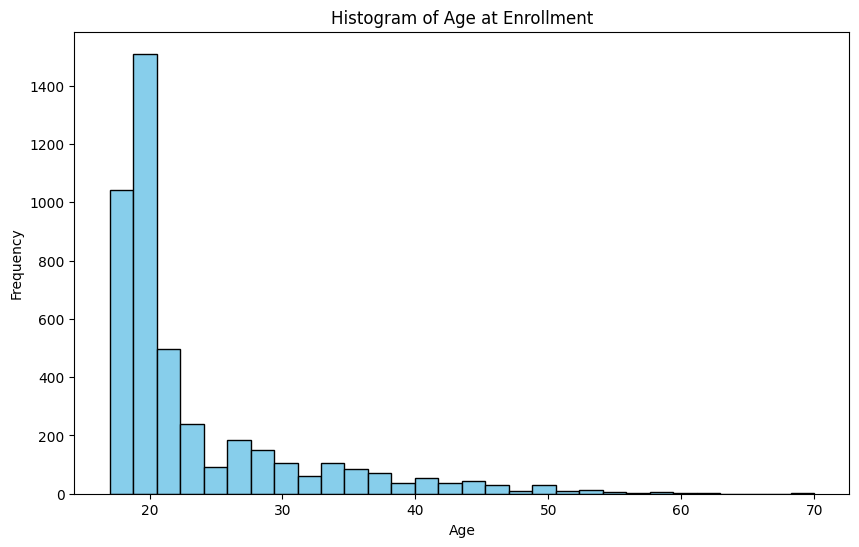

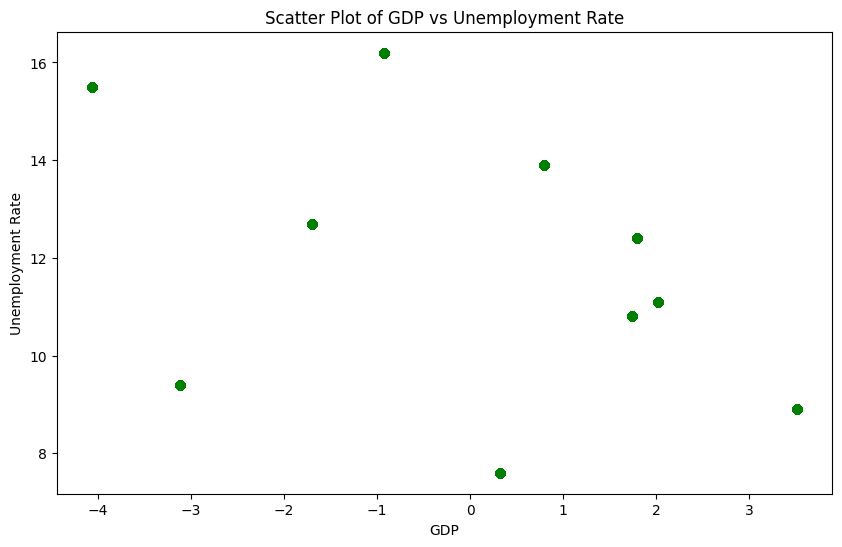

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset
data = pd.read_csv('dataset.csv')

# Histogram
plt.figure(figsize=(10, 6))
plt.hist(data['Age at enrollment'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Age at Enrollment')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(data['GDP'], data['Unemployment rate'], color='green')
plt.title('Scatter Plot of GDP vs Unemployment Rate')
plt.xlabel('GDP')
plt.ylabel('Unemployment Rate')
plt.show()

In [10]:
with torch.no_grad():
    test_inputs = X_test_tensor.view(X_test_tensor.size(0), 1, -1)
    test_outputs = model(test_inputs)
    test_loss = criterion(test_outputs, y_test_tensor)
    _, y_pred = torch.max(test_outputs, 1)  # Store predicted labels
    accuracy = (y_pred == y_test_tensor).sum().item() / len(y_test_tensor)

print(f'Test Loss: {test_loss.item():.4f}')
print(f'Test Accuracy: {accuracy:.4f}')


Test Loss: 0.5238
Test Accuracy: 0.7944


Confusion Matrix:
 [[275  18  23]
 [ 39  71  41]
 [ 28  33 357]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.84       316
           1       0.58      0.47      0.52       151
           2       0.85      0.85      0.85       418

    accuracy                           0.79       885
   macro avg       0.74      0.73      0.74       885
weighted avg       0.79      0.79      0.79       885



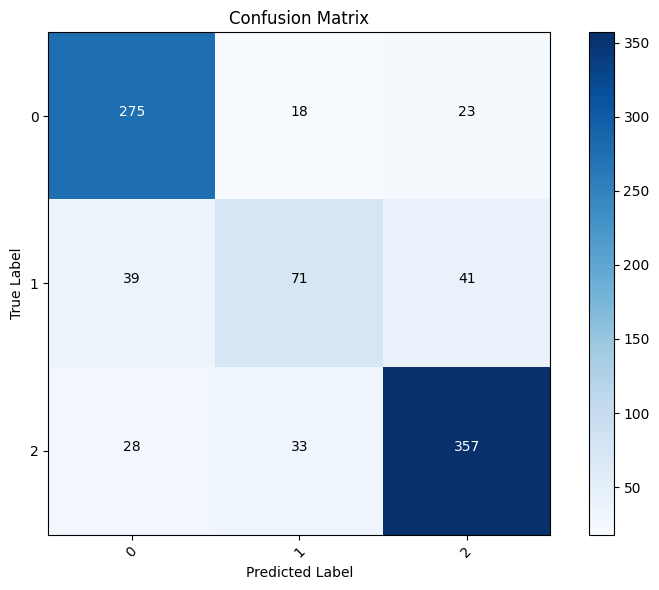

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Assuming y_test contains the true labels and y_pred contains the predicted labels

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Generate classification report
class_names = np.unique(y_test).astype(str)  # Convert to string
report = classification_report(y_test, y_pred, target_names=class_names)
print("Classification Report:\n", report)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

In [13]:
!zip -r '/content/folder/"capstone.zip"' '/content/folder/"CAPSTONE"'

	zip warning: name not matched: /content/folder/"CAPSTONE"

zip error: Nothing to do! (try: zip -r /content/folder/"capstone.zip" . -i /content/folder/"CAPSTONE")
